## Import Libraries & Load Dataset

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import Xception
from tensorflow.keras.callbacks import ModelCheckpoint 
import matplotlib.pyplot as plt

## Waste Dataset

In [2]:
image_generator = ImageDataGenerator(
    rescale = 1.0 / 255.0,
    zoom_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    rotation_range = 10,
    validation_split = 0.2
)
image_generator_test = ImageDataGenerator(
    rescale = 1.0 / 255.0
)

In [3]:
path_train = "/content/drive/MyDrive/Dataset/Waste Classification data/DATASET/TRAIN"
path_test = "/content/drive/MyDrive/Dataset/Waste Classification data/DATASET/TEST"
Train = image_generator.flow_from_directory(
    path_train,
    class_mode = "categorical",
    batch_size = 32,
    target_size = (299,299),
    subset = "training"
)
Val = image_generator.flow_from_directory(
    path_train,
    class_mode = "categorical",
    batch_size = 32,
    target_size = (299,299),
    subset = "validation"
)
Test = image_generator_test.flow_from_directory(
    path_test,
    class_mode = "categorical",
    batch_size = 32,
    target_size = (299,299),
)

Found 15353 images belonging to 2 classes.
Found 3837 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


# Model
## Transfer Learning

## Xception

In [5]:
xception_model = Xception(weights="imagenet",input_shape=(299,299,3),include_top=False)
xception_model.trainable = False

In [6]:
model = Sequential()
model.add(xception_model)
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2,activation="softmax"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 flatten (Flatten)           (None, 204800)            0         
                                                                 
 dense (Dense)               (None, 512)               104858112 
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 2

In [8]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
checkpoint = ModelCheckpoint("Waste_model.h5",monitor="val_accuracy",mode="max",save_best_only=True)

In [9]:
history = model.fit(Train,
                    epochs=10,
                    validation_data=Val,
                    callbacks=[checkpoint])

Epoch 1/10
480/480 [==============================] - 571s 1s/step - loss: 0.6884 - accuracy: 0.8946 - val_loss: 0.1744 - val_accuracy: 0.9382
Epoch 2/10
480/480 [==============================] - 550s 1s/step - loss: 0.1844 - accuracy: 0.9341 - val_loss: 0.1717 - val_accuracy: 0.9434
Epoch 3/10
480/480 [==============================] - 553s 1s/step - loss: 0.1646 - accuracy: 0.9446 - val_loss: 0.1414 - val_accuracy: 0.9531
Epoch 4/10
480/480 [==============================] - 548s 1s/step - loss: 0.1393 - accuracy: 0.9483 - val_loss: 0.1409 - val_accuracy: 0.9505
Epoch 5/10
480/480 [==============================] - 546s 1s/step - loss: 0.1378 - accuracy: 0.9515 - val_loss: 0.2286 - val_accuracy: 0.9156
Epoch 6/10
480/480 [==============================] - 549s 1s/step - loss: 0.1226 - accuracy: 0.9565 - val_loss: 0.1611 - val_accuracy: 0.9476
Epoch 7/10
480/480 [==============================] - 543s 1s/step - loss: 0.1236 - accuracy: 0.9575 - val_loss: 0.2222 - val_accuracy: 0.9299

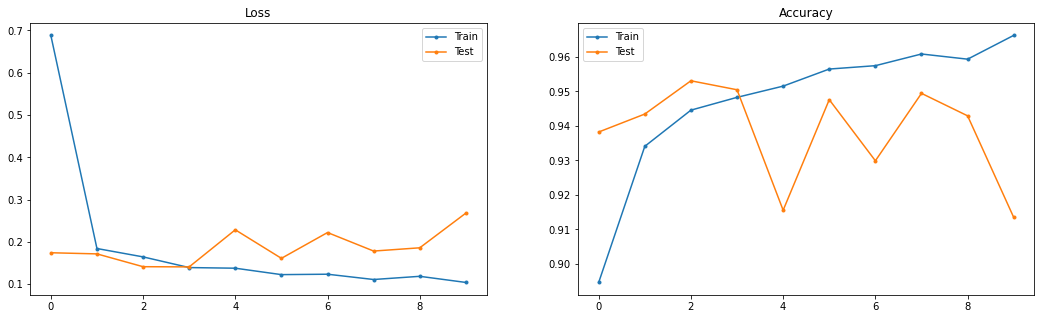

In [10]:
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(18,5))
ax1.set_title("Loss")
ax2.set_title("Accuracy")
ax1.plot(history.history["loss"],label="Train",marker=".")
ax1.plot(history.history["val_loss"],label="Test",marker=".")
ax2.plot(history.history["accuracy"],label="Train",marker=".")
ax2.plot(history.history["val_accuracy"],label="Test",marker=".")
ax1.legend()
ax2.legend()
plt.show()


In [11]:
model.evaluate(Test)

79/79 [==============================] - 43s 537ms/step - loss: 0.3753 - accuracy: 0.9113


[0.3753199279308319, 0.9112614393234253]